In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

trans = pd.read_excel("/home/tina/Documents/UPPD/Izola/Erar-OBCINAIZOLA.xlsx")

In [4]:
trans.head()

,ID dokumenta,Prejeto,Plačnik,Prejemnik,Referenca v dobro,Znesek,Datum plačila
0,12864155,2018-01-26 14:57:12,OBČINA IZOLA,VGP DRAVA Ptuj d.o.o.,SI00006542-18001,1220.00,27. 2. 2018
1,12863700,2018-01-26 14:26:46,OBČINA IZOLA,ZDRAVSTVENI DOM KOPER CASA DELLA SANITA CAPODI...,NaN,1280.00,Ni podatka o plačilu
2,12863437,2018-01-26 14:10:41,OBČINA IZOLA,RIŽANSKI VODOVOD KOPER d.o.o. - s.r.l.,SI125001800287764,8.86,27. 2. 2018
3,12863418,2018-01-26 14:10:39,OBČINA IZOLA,RIŽANSKI VODOVOD KOPER d.o.o. - s.r.l.,SI125001800313862,5.70,27. 2. 2018
4,12862904,2018-01-26 13:49:47,OBČINA IZOLA,Uvid.si d.o.o.,SI0004-18,122.00,27. 2. 2018


In [5]:
table = pd.pivot_table(trans, values='Znesek', index=['Prejemnik'], aggfunc=np.sum)

In [6]:
table

,Znesek
Prejemnik,
2D - ambienti d.o.o.,2935.83
3 PORT d.o.o. Koper,5636.40
"A1 Slovenija, d. d.",2840.92
"AAS d.o.o., Ljubljana",435.40
ABANKA d.d.,18493.69
...,...
Zavod VOZIM,305.00
Zavod eVITA,84.00
ŠKERJANC d.o.o.,7340.12


In [7]:
table2 = pd.pivot_table(trans, values='Znesek', index=['Prejemnik'], aggfunc={'Znesek': [np.sum, np.mean, min, max, 'count']})

In [8]:
table2['cooperation'] = 'not likely'
table2.loc[(table2['count'] > 5) & (table2['count'] <= 9), 'cooperation'] = 'likely'
table2.loc[(table2['count'] >= 10), 'cooperation'] = 'very likely'

In [9]:
table2

,count,max,mean,min,sum,cooperation
Prejemnik,,,,,,
2D - ambienti d.o.o.,1,2935.83,2935.830000,2935.83,2935.83,not likely
3 PORT d.o.o. Koper,7,805.20,805.200000,805.20,5636.40,likely
"A1 Slovenija, d. d.",13,1049.99,218.532308,1.00,2840.92,very likely
"AAS d.o.o., Ljubljana",1,435.40,435.400000,435.40,435.40,not likely
ABANKA d.d.,12,2877.83,1541.140833,51.39,18493.69,very likely
...,...,...,...,...,...,...
Zavod VOZIM,1,305.00,305.000000,305.00,305.00,not likely
Zavod eVITA,1,84.00,84.000000,84.00,84.00,not likely
ŠKERJANC d.o.o.,2,6348.55,3670.060000,991.57,7340.12,not likely


In [10]:
table2['sum'].max()
c_count = [table2['count'].mean(), table2['count'].median(), table2['count'].std()]
s_count = [table2['sum'].mean(), table2['sum'].median(), table2['sum'].std()]
corel = table2.corr(method ='pearson')
print(c_count)
print(s_count)
print(corel)

[9.25925925925926, 3.0, 26.835482161779343]
[24901.195401234574, 2561.145, 104781.34286187583]
          count       max      mean       min       sum
count  1.000000  0.214263 -0.016643 -0.076502  0.712597
max    0.214263  1.000000  0.905534  0.662479  0.501970
mean  -0.016643  0.905534  1.000000  0.880186  0.284027
min   -0.076502  0.662479  0.880186  1.000000  0.114217
sum    0.712597  0.501970  0.284027  0.114217  1.000000


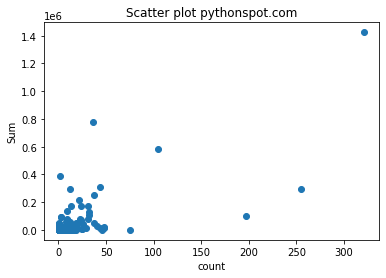

In [11]:
plt.scatter(table2['count'], table2['sum'])
plt.title('Scatter plot pythonspot.com')
plt.xlabel('count')
plt.ylabel('Sum')
plt.show()

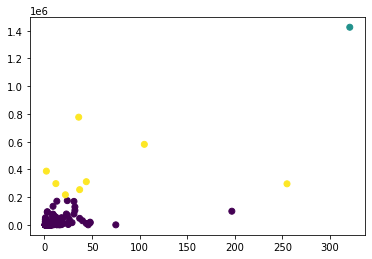

In [12]:
from sklearn.cluster import KMeans
Z = table2[['count', 'sum']].to_numpy()

kmeans = KMeans(n_clusters=3)
kmeans.fit(Z)
clusters = kmeans.predict(Z)

plt.scatter(*Z.T, c=clusters, cmap='viridis')


In [13]:
kmeans.cluster_centers_

array([[6.87619048e+00, 1.11737467e+04],
       [3.21000000e+02, 1.42516913e+06],
       [6.41250000e+01, 3.90385996e+05]])

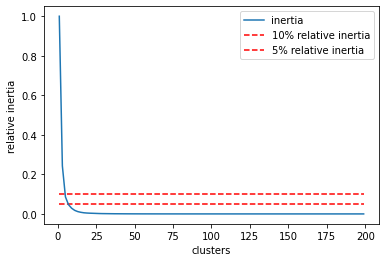

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# import and shuffle the data
data = Z
X = data
X_shuffled = shuffle(X, random_state=0)

scaler = StandardScaler() # need to scale data to make kmeans work properly
Xt = scaler.fit_transform(X_shuffled[:500]) # down sample for speed
n_clusters = range(1, 200, 2)
inertia = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(Xt)
    inertia.append(kmeans.inertia_)

plt.plot(n_clusters, inertia/inertia[0])
plt.hlines(0.1, n_clusters[0], n_clusters[-1], 'r', linestyles='dashed')
plt.hlines(0.05, n_clusters[0], n_clusters[-1], 'r', linestyles='dashed')
plt.xlabel('clusters')
plt.ylabel('relative inertia')
plt.legend(['inertia', '10% relative inertia', '5% relative inertia']);

In [15]:
from sklearn.preprocessing import StandardScaler

# create and fit scaler
scaler = StandardScaler()
scaler.fit(Z)

# scale data set
Xt = scaler.transform(Z)

# create data frame with results
stats = np.vstack((Z.mean(axis=0), X.var(axis=0), Xt.mean(axis=0), Xt.var(axis=0))).T
#feature_names = table2['feature_names']
columns = ['unscaled mean', 'unscaled variance', 'scaled mean', 'scaled variance']

df = pd.DataFrame(stats,  columns=columns)
df

,unscaled mean,unscaled variance,scaled mean,scaled variance
0,9.259259,7.179204e+02,-1.370646e-17,1.0
1,24901.195401,1.094524e+10,-8.223874e-18,1.0


In [22]:
from sklearn.compose import ColumnTransformer
col_transformer = ColumnTransformer(
    remainder='passthrough',
    transformers=[
        ('remove', 'drop', 0),
        ('scaler', StandardScaler(), slice(0,2))
    ]
)

Xt = col_transformer.fit_transform(Z)

print('Number of features in X:', X.shape[1])
print('Number of features Xt:', Xt.shape[1])
print('Count mean before transformation?', Z.mean(axis=0)[0])
print('Count mean before transformation?', Xt.mean(axis=0)[0])
print('Sum mean before transformation?', Z.mean(axis=0)[1])
print('Sum mean before transformation?', Xt.mean(axis=0)[1])

Number of features in X: 2
Number of features Xt: 2
Count mean before transformation? 9.25925925925926
Count mean before transformation? -1.3706457094137734e-17
Sum mean before transformation? 24901.195401234574
Sum mean before transformation? -8.22387425648264e-18


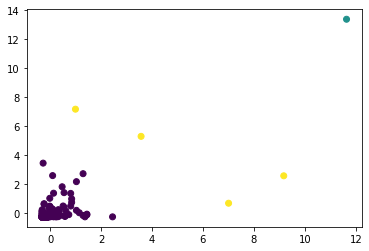

In [23]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(Xt)
clusters = kmeans.predict(Xt)

plt.scatter(*Xt.T, c=clusters, cmap='viridis')

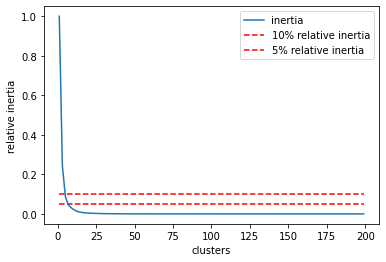

In [103]:
data = Xt
X = data
X_shuffled = shuffle(X, random_state=0)

scaler = StandardScaler() # need to scale data to make kmeans work properly
Xt = scaler.fit_transform(X_shuffled[:500]) # down sample for speed
n_clusters = range(1, 200, 2)
inertia = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(Xt)
    inertia.append(kmeans.inertia_)

plt.plot(n_clusters, inertia/inertia[0])
plt.hlines(0.1, n_clusters[0], n_clusters[-1], 'r', linestyles='dashed')
plt.hlines(0.05, n_clusters[0], n_clusters[-1], 'r', linestyles='dashed')
plt.xlabel('clusters')
plt.ylabel('relative inertia')
plt.legend(['inertia', '10% relative inertia', '5% relative inertia']);

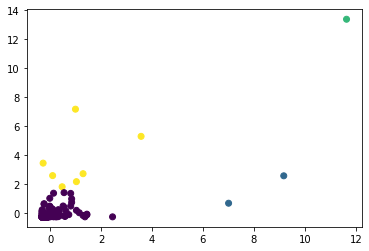

In [108]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(Xt)
clusters = kmeans.predict(Xt)

plt.scatter(*Xt.T, c=clusters, cmap='viridis')

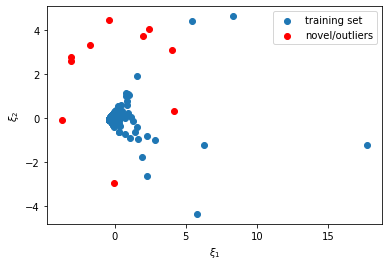

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# load data set
X = Z

# truncate to two variables
pipe = Pipeline([('scaler', StandardScaler()), ('dim_red', PCA(n_components=2))])
Xp = pipe.fit_transform(X)

# generate novel/outlier points
np.random.seed(1)
theta = 2*np.pi*np.random.random(10)
X_test = np.vstack((4*np.cos(theta) + np.random.random(10), 4*np.sin(theta) + np.random.random(10)))

plt.scatter(*Xp.T)
plt.scatter(*X_test, c='red')
plt.xlabel('$\\xi_1$')
plt.ylabel('$\\xi_2$');
plt.legend(["training set", "novel/outliers"]);